# Evolution of Einstein's equations

# Initial data constants definition

# Initial data , setting length of the domain and discretization


In [550]:
m=3;
res=m;
N=2.0^m*100.0;
Rf=40.0;

dx=Rf/N;
dt=round(dx*0.4,digits=10);
Nt=100.0*2^m;
Tf=Nt*dt; #final time

println("the final time is ", Tf)

the final time is 16.0


In [551]:
println("dx =", dx)
println("dt =", dt)
println("dx/dt =", dx/dt)
println("epsilon <= dx/dt * (1/2)^(2*2-1) = ", dx/dt*(1/2)^(2*2-1))

println("epsilon = dx/dt * (1/2)^(2*2) = ", dx/dt*(1/2)^(2*2))

println("epsilon = dx/dt * (1/2)^(2*3) = ", dx/dt*(1/2)^(2*3))

dx =0.05
dt =0.02
dx/dt =2.5
epsilon <= dx/dt * (1/2)^(2*2-1) = 0.3125
epsilon = dx/dt * (1/2)^(2*2) = 0.15625
epsilon = dx/dt * (1/2)^(2*3) = 0.0390625


In [552]:
# Setting RESOLUTION

global dir = "/home/rita13santos/Desktop/MSc Thesis/DATA/res$res"

"/home/rita13santos/Desktop/MSc Thesis/DATA/res3"

In [553]:
println(dx)
println(dt)

0.05
0.02


In [554]:
epsilon=0.01##0.01#0.05; #05; #02;#0.05; #0.05; #0.05;#0.05;#0.05; #dissipation strength (-1 for backwards integration)
omicron=0.0;#setting dissipation operator to O(R^2)
omega=120.0; #1/dx^4; #1/dx^2; #/dx^4;""

# Grid

In [555]:
ori=0.0;
R1 = nothing
R1=range(ori, stop=Rf, step=dx);

print(size(R1))

(801,)

In [556]:
print(dx)
#R = range(ori-2.0*dx, stop=Rf+2.0*dx, step=dx);
R = range(round(ori-3.0*dx,digits=10), stop=Rf+3.0*dx, step=dx)

L=length(R);
println("step size is  ", dx)

#T=range(dt,stop=Tf,step=dt)
T=range(0,stop=Tf-dt,step=dt)
println("the time step is ", dt)
println(size(T))
println(size(R))

println(R[L-3])
println(L)

0.05step size is  0.05
the time step is 0.02
(800,)
(807,)
40.0
807


In [557]:
include("./TestModel.jl");

# Solving for the constraints of f and g

In [558]:
initf=zeros(L);
initg=zeros(L);

f0=0;
g0=-sin(40);
#g0=0

initf[4:L-3]=rk4wrapper(TMconstraint_f,f0,R1,0)
#initg[4:L-3]=rungekutta4(TMconstraint_g,g0,R1)
initg[4:L-3] = sin.(R1.*(4.0*pi)/10.0)

#ghost points
"initf[2]=extrapolate_in(initf[3],initf[4])
initf[1]=extrapolate_in(initf[2],initf[3])

initg[2]=extrapolate_in(initg[3],initg[4])
initg[1]=extrapolate_in(initg[2],initg[3])"


#ghost points
"initf[2]=extrapolate_in_new(initf[3],initf[4],initf[5],initf[6])
initf[1]=extrapolate_in_new(initf[2],initf[3],initf[4],initf[5])

initg[2]=extrapolate_in_new(initg[3],initg[4],initg[5],initg[6])
initg[1]=extrapolate_in_new(initg[2],initg[3],initg[4],initg[5])

initf[L-1]=extrapolate_out_new(initf[L-5],initf[L-4],initf[L-3],initf[L-2])
initf[L]=extrapolate_out_new(initf[L-4],initf[L-3],initf[L-2],initf[L-1])

initg[L-1]=extrapolate_out_new(initg[L-5],initg[L-4],initg[L-3],initg[L-2])
initg[L]=extrapolate_out_new(initg[L-4],initg[L-3],initg[L-2],initg[L-1])
"

"initf[2]=extrapolate_in_new(initf[3],initf[4],initf[5],initf[6])\ninitf[1]=extrapolate_in_new(initf[2],initf[3],initf[4],initf[5])\n\ninitg[2]=extrapolate_in_new(initg[3],initg[4],initg[5],initg[6])\ninitg[1]=extrapolate_in_new(initg[2],initg[3],initg[4],initg[5])\n\ninitf[L-1" ⋯ 21 bytes ⋯ "(initf[L-5],initf[L-4],initf[L-3],initf[L-2])\ninitf[L]=extrapolate_out_new(initf[L-4],initf[L-3],initf[L-2],initf[L-1])\n\ninitg[L-1]=extrapolate_out_new(initg[L-5],initg[L-4],initg[L-3],initg[L-2])\ninitg[L]=extrapolate_out_new(initg[L-4],initg[L-3],initg[L-2],initg[L-1])\n"

# Defining the initial state array for the evolution

In [559]:
state_array=[initf initg];
#state_array=[initf zeros(length(initf))];
state_array=ghost(state_array);
using CSV, Tables
CSV.write(dir*"/time_step0.csv", Tables.table(state_array), writeheader=false)

"/home/rita13santos/Desktop/MSc Thesis/DATA/res3/time_step0.csv"

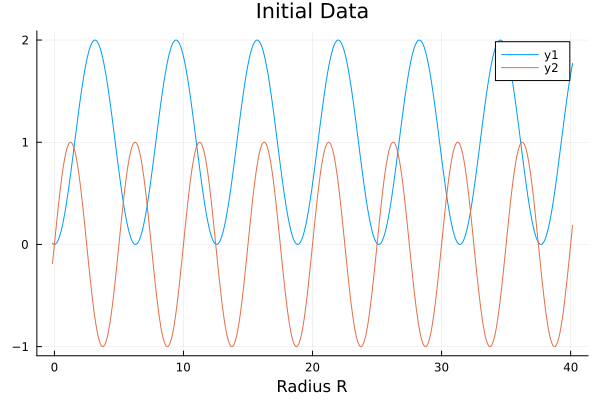

In [560]:
using Plots #showing initial data and the initial status of the horizon finder
plot(R, state_array, xaxis="Radius R",title="Initial Data")

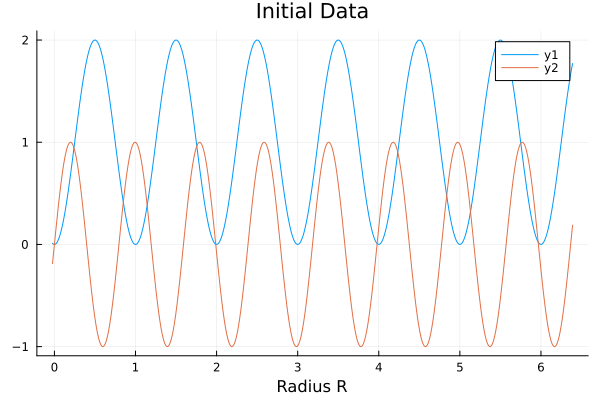

In [561]:
using Plots #showing initial data and the initial status of the horizon finder
plot(R./(2.0*pi), state_array, xaxis="Radius R",title="Initial Data")

 ## Evolution

In [562]:
using ProgressMeter
@showprogress for k in 1:length(T)
    state_array=rungekutta4molstep(TMRHS,state_array,T,k,0) 
    #state_array=ghost(state_array)
     CSV.write(dir*"/time_step$k.csv", Tables.table(state_array), writeheader=false)
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:11


In [563]:
print(Tables.table(state_array))

Tables.MatrixTable{Matrix{Float64}} with 807 rows, 2 columns, and schema:
 :Column1  Float64
 :Column2  Float64

In [564]:
print(dir)

/home/rita13santos/Desktop/MSc Thesis/DATA/res3

## Movie of the evolution

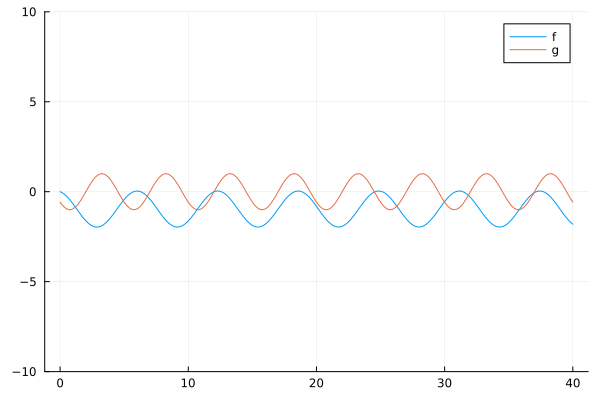

In [565]:
using Plots, CSV, DataFrames
import GR
for n in 1:1:length(T)-1
    time_step=T[n+1]-T[n];
    IJulia.clear_output(true)
    functions3=DataFrame(CSV.File(dir*"/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
    d=round(T[n],digits=1)
    plot!(R1, [plot1 plot2], labels=["f" "g"],ylims=(-10,10)) |> display 
    
    end

Save image

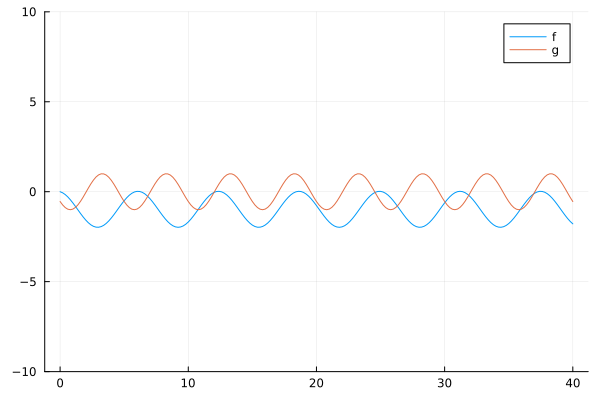

┌ Info: Saved animation to 
│   fn = /home/rita13santos/Desktop/MSc Thesis/anim_res1.gif
└ @ Plots /home/rita13santos/.julia/packages/Plots/fw4rv/src/animation.jl:156


Plots.AnimatedGif("/home/rita13santos/Desktop/MSc Thesis/anim_res1.gif")
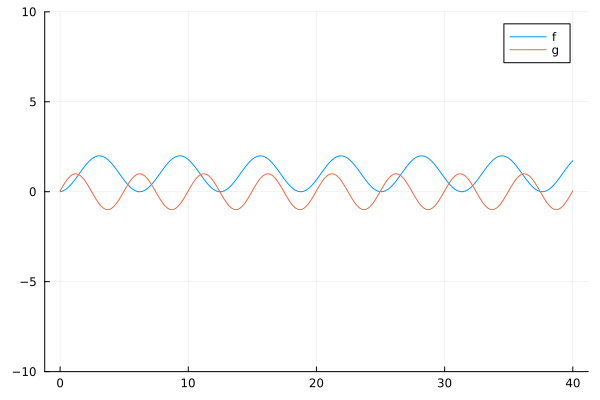

In [82]:
anim = @animate for n in 1:1:length(T)-1
time_step=T[n+1]-T[n];
    IJulia.clear_output(true)
    functions3=DataFrame(CSV.File(dir*"/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
    d=round(T[n],digits=1)
    plot!(R1, [plot1 plot2], labels=["f" "g"],ylims=(-10,10)) |> display 
    
end
gif(anim, "anim_res$res.gif", fps = 15)